In [36]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt


columns = ['io_mode', 'bandwidth', 'total_size', 'block_size', 'latency']
df = None
for file in glob.glob('./bk/run*/ioperf-*.csv'):
    data = pd.read_csv(file)
    if data['iomode'].unique()[0] == 0:
        data['bandwidth'] = [0] * data.shape[0]
    if df is None:
        df = data
    else:
        df = pd.concat([df, data], axis=0)  

df.columns = columns
df['bandwidth'] /= 1000
df['total_size'] = np.log2(df['total_size'])
df['block_size'] = np.log2(df['block_size'])
df = df.groupby(['io_mode', 'bandwidth', 'total_size', 'block_size']).min().reset_index()
df.to_csv('./ioperf.csv', index=None)

In [37]:
df1 = df[df['io_mode'] == 0]
df2 = df[df['io_mode'] == 1]

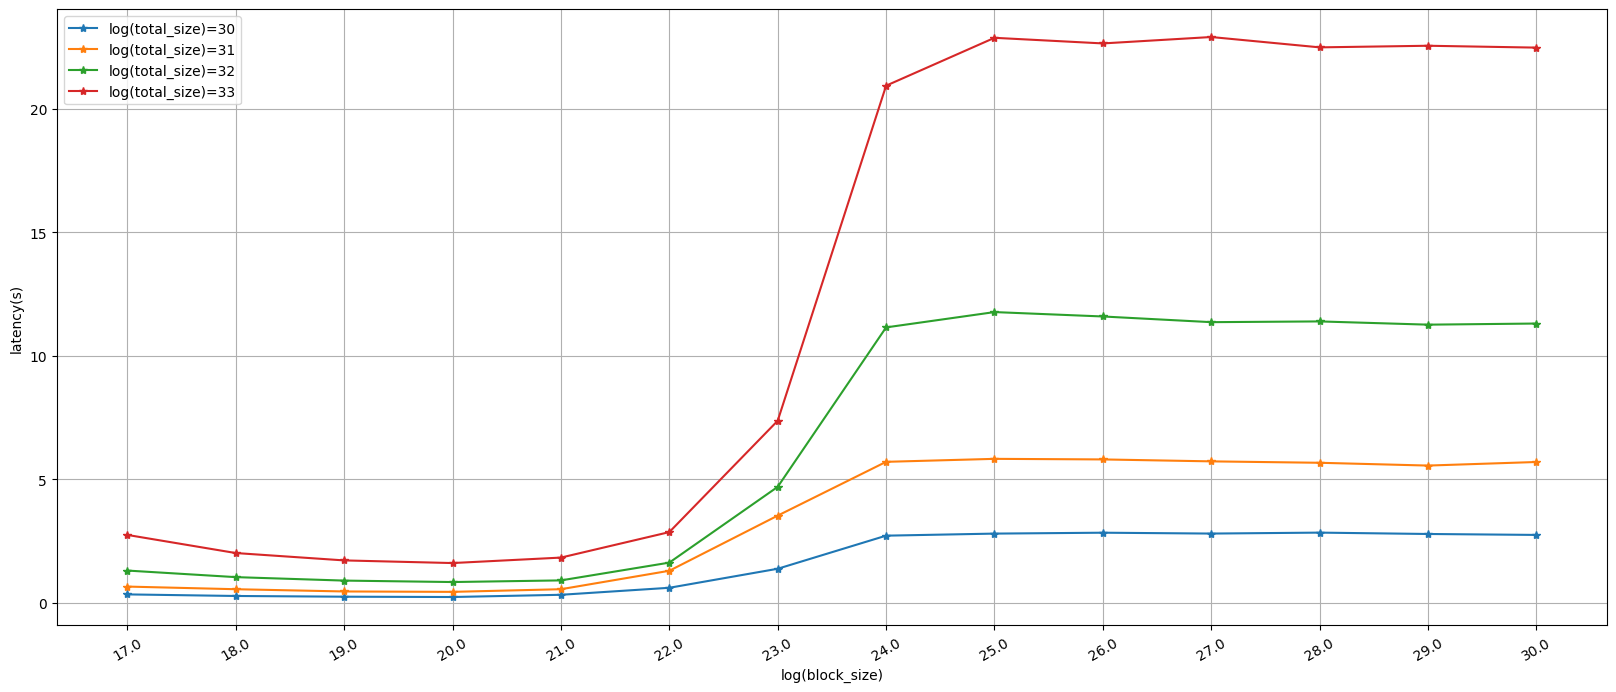

In [38]:
fig = plt.figure(figsize=(20, 8))
for total_size, group in df1.groupby(by='total_size'):
    x = np.arange(len(group['block_size'].unique()))
    group.sort_values(by='block_size', inplace=True)
    plt.plot(x, group['latency'], marker='*', label=f"log(total_size)={int(total_size)}")
    plt.xticks(x, group['block_size'], rotation=30)

plt.xlabel('log(block_size)')
plt.ylabel('latency(s)')
plt.legend()
plt.grid()
plt.show()

In [41]:
2**25/1024/1024

32.0

/tmp/ipykernel_450917/2181999644.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_size'] = df2['total_size'].astype('category')


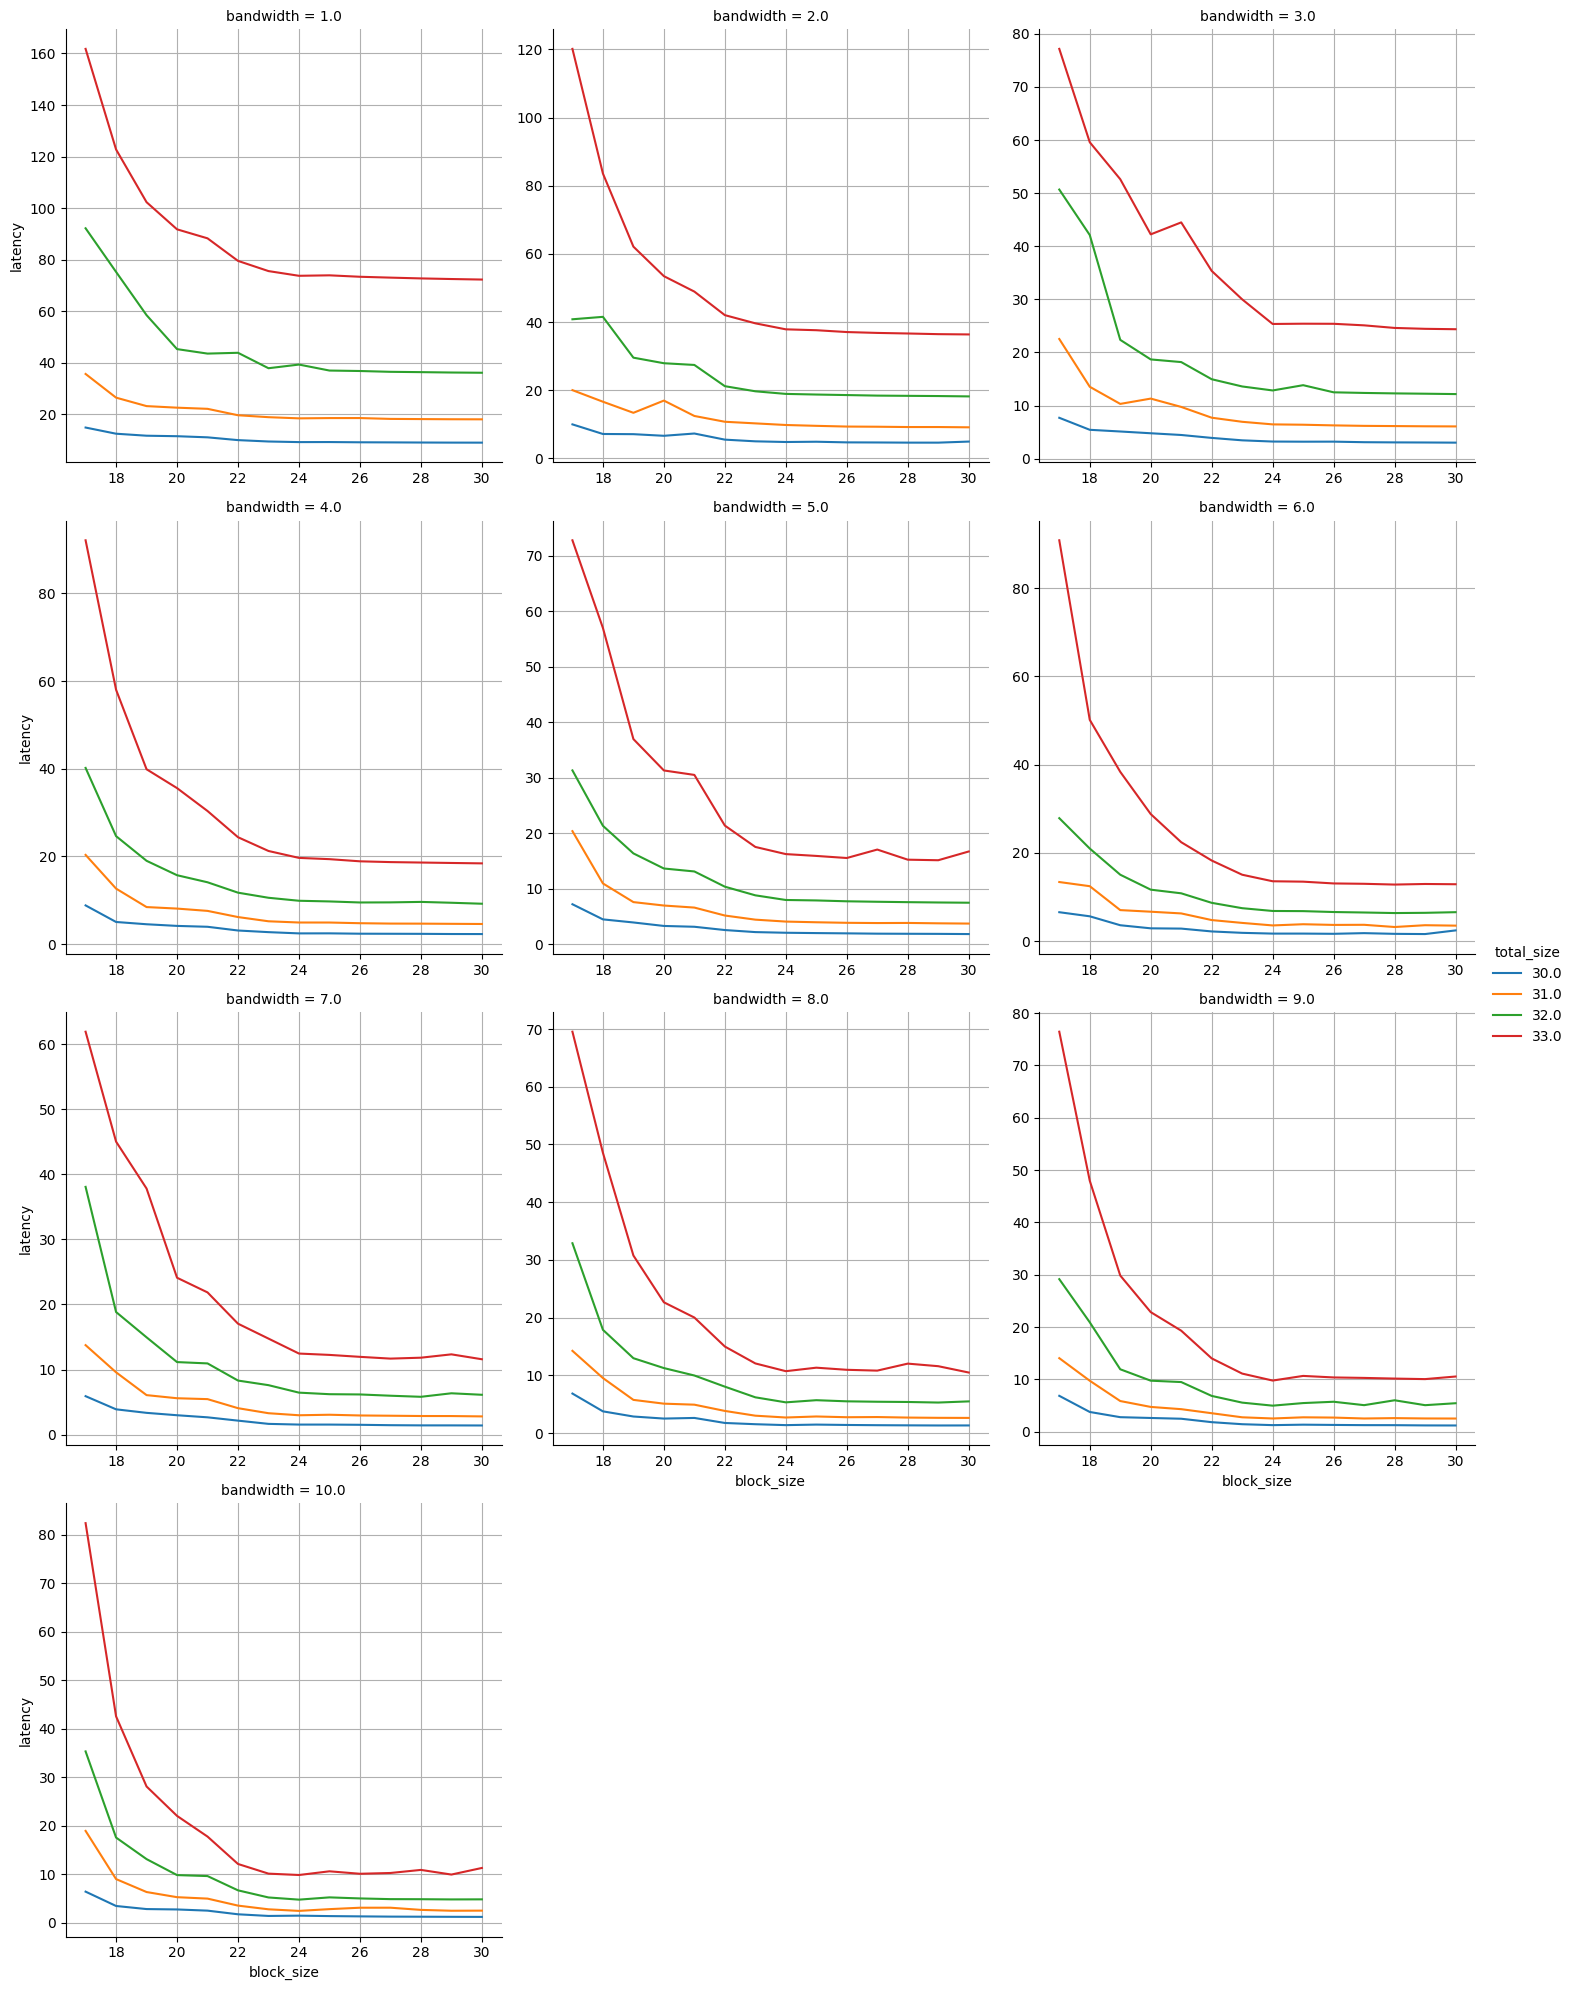

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert 'total_size' to categorical so it can be used in hue
df2['total_size'] = df2['total_size'].astype('category')

g = sns.relplot(
    data=df2,
    x='block_size',
    y='latency',
    hue='total_size',  # Color by 'total_size'
    col='bandwidth',  # Different subplot for each 'bandwidth'
    kind='line',  # Line plot
    col_wrap=3,
    facet_kws=dict(sharex=False, sharey=False),  # Do not share x-axis among subplots
)

# Add grid to all subplots and adjust xticks
for ax in g.axes.flatten():
    ax.grid(True)  # Add grid

plt.show()